In [115]:
from lsmulator import *
from workloads import *
import numpy as np
import matplotlib.pyplot as plt
from figure_grid import *
from bloom_assignments import *
import pickle
from mpl_toolkits.mplot3d import Axes3D
from plot_helpers import *

In [53]:
n = 50000
k = 5000

workloads_arr = [
  UniformWorkload(n_queries=n, k_classes=k),
  RoundRobinWorkload(n_queries=n, k_classes=k),
  ZipfWorkload(n_queries=n, zipf_param=1.1),
  ZipfWorkload(n_queries=n, zipf_param=1.5),
  DiscoverDecayWorkload(n_queries=n),
  DiscoverDecayWorkload(n_queries=n, decay_rate=scipy.stats.beta(2, 1)),
  DiscoverDecayWorkload(n_queries=n, updates=scipy.stats.poisson(16), decay_rate=scipy.stats.beta(2, 1)),
  PeriodicDecayWorkload(n_queries=n, period=100),
  PeriodicDecayWorkload(n_queries=n, period=1000),
  PeriodicDecayWorkload(n_queries=n, period=1000, decay_rate=scipy.stats.beta(2, 1))
]

workloads = {}
for wl in workloads_arr:
  wl.queries
  workloads[str(wl)] = wl

In [60]:
result_fnames = [
  'results0.pkl',
  'results1.pkl',
  'results2.pkl',
  'results20.pkl',
  'results21.pkl',
  'results3.pkl',
  'results4.pkl',
  'results5.pkl',
  'results6.pkl'
]

results = [pickle.load(open('../'+fn, 'rb')) for fn in result_fnames]

In [125]:
def plot_result(r):
  wl_name, M, dM, data_bl, data_mk = r
  wl = workloads[wl_name]
  memtbsize_bl = np.array([d[0] for d in data_bl])
  cachesize_bl = np.array([d[1] for d in data_bl])
  daccesses_bl = np.array([d[2] for d in data_bl])
  i = np.argmin(daccesses_bl)
  
  memtbsize_mk = np.array([d[0] for d in data_mk])
  cachesize_mk = np.array([d[1] for d in data_mk])
  daccesses_mk = np.array([d[2] for d in data_mk])
  j = np.argmin(daccesses_mk)
  
  plt.subplot(111, projection='3d')
  plt.gca().plot_trisurf(memtbsize_bl, cachesize_bl, daccesses_bl, alpha=0.25, color='red')
  plt.gca().plot_trisurf(memtbsize_mk, cachesize_mk, daccesses_mk, alpha=0.25, color='blue')
  
  plt.scatter(memtbsize_bl[i], cachesize_bl[i], zs=daccesses_bl[i], c='red', s=100)
  plt.scatter(memtbsize_mk[j], cachesize_mk[j], zs=daccesses_mk[j], c='blue', s=100)

  plt.gca().set_zlabel('Disk accesses')
  plt.xlabel('Memtbl')
  plt.ylabel('Cache')
  plt.title('M = {}, dM = {}, Workload = {}'.format(M, dM, wl_name))
  print('Baseline min: memtbl =', memtbsize_bl[i], 'cache =', cachesize_bl[i], 'bloom =', M-memtbsize_bl[i]-cachesize_bl[i])
  print('  Monkey min: memtbl =', memtbsize_mk[j], 'cache =', cachesize_mk[j], 'bloom =', M-memtbsize_mk[j]-cachesize_bl[j])
  plt.show()
  


<IPython.core.display.Javascript object>


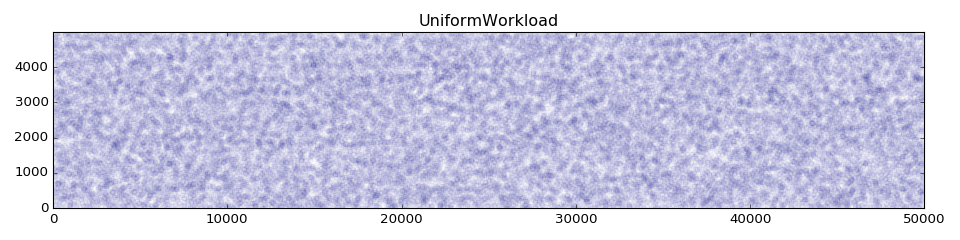

In [126]:
plot_workloads([workloads[str(results[0][0])]])

<IPython.core.display.Javascript object>


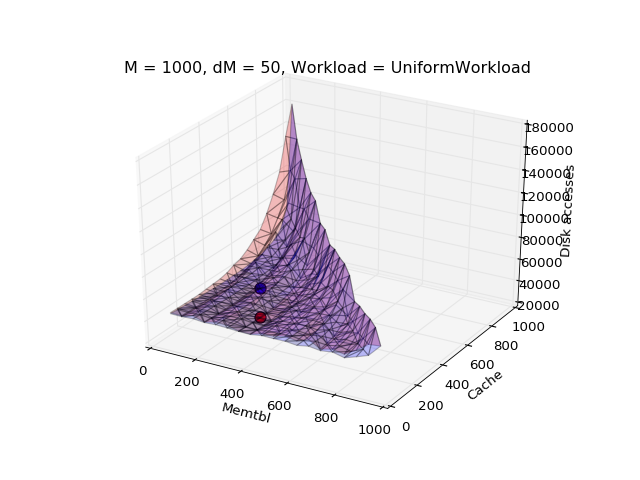

Baseline min: memtbl = 350 cache = 200 bloom = 450
  Monkey min: memtbl = 200 cache = 450 bloom = 350


In [127]:
%matplotlib notebook
plot_result(results[0])

<IPython.core.display.Javascript object>


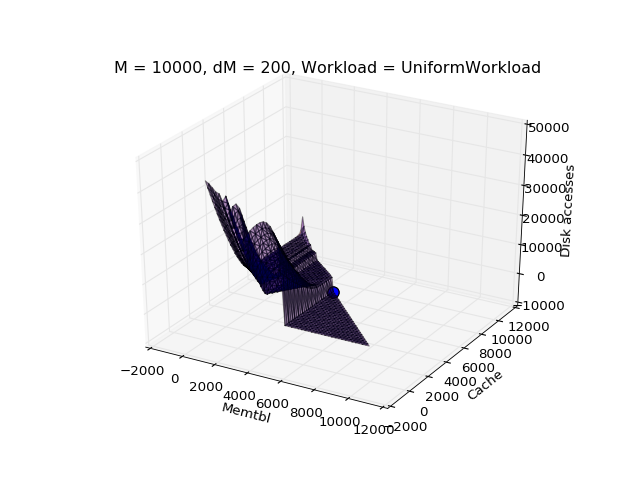

Baseline min: memtbl = 4800 cache = 5200 bloom = 0
  Monkey min: memtbl = 4800 cache = 5200 bloom = 0


In [128]:
%matplotlib notebook

plot_result(results[1])

<IPython.core.display.Javascript object>


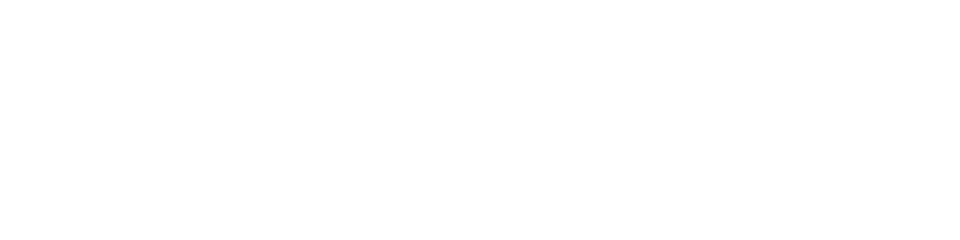

In [129]:
plot_workloads([workloads[str(results[3][0])]])

<IPython.core.display.Javascript object>


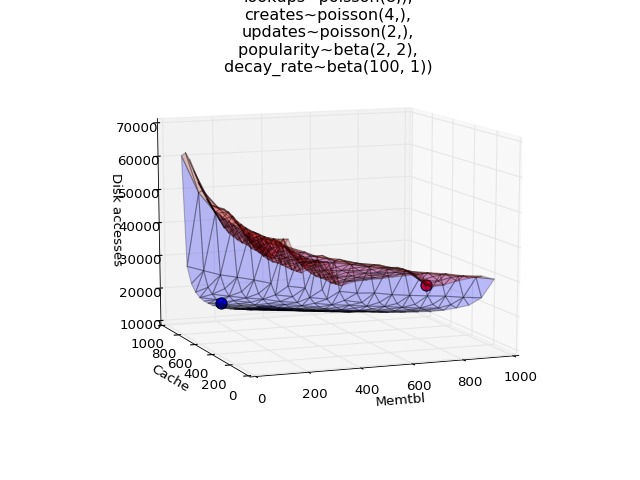

Baseline min: memtbl = 700 cache = 100 bloom = 200
  Monkey min: memtbl = 100 cache = 650 bloom = 250


In [130]:
%matplotlib notebook

plot_result(results[3])

<IPython.core.display.Javascript object>


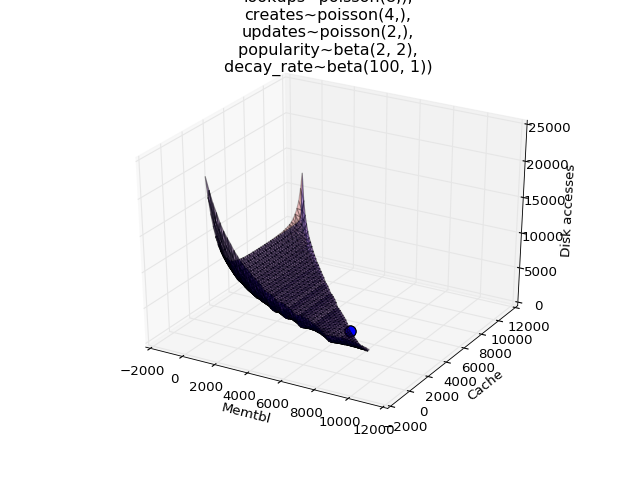

Baseline min: memtbl = 7200 cache = 2800 bloom = 0
  Monkey min: memtbl = 7200 cache = 2800 bloom = 0


In [131]:
%matplotlib notebook

plot_result(results[4])

<IPython.core.display.Javascript object>


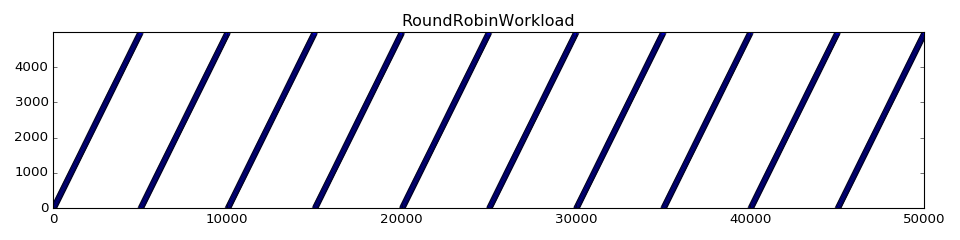

In [121]:
plot_workloads([workloads[str(results[5][0])]])

<IPython.core.display.Javascript object>


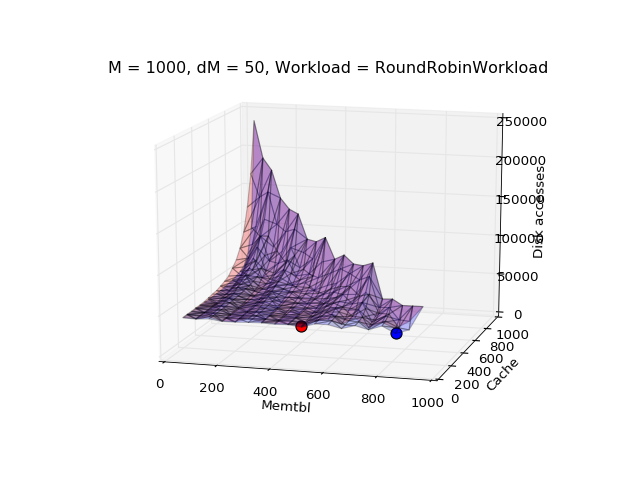

Baseline min: memtbl = 500 cache = 50 bloom = 450
  Monkey min: memtbl = 850 cache = 50 bloom = 100


In [132]:
%matplotlib notebook

plot_result(results[5])

<IPython.core.display.Javascript object>


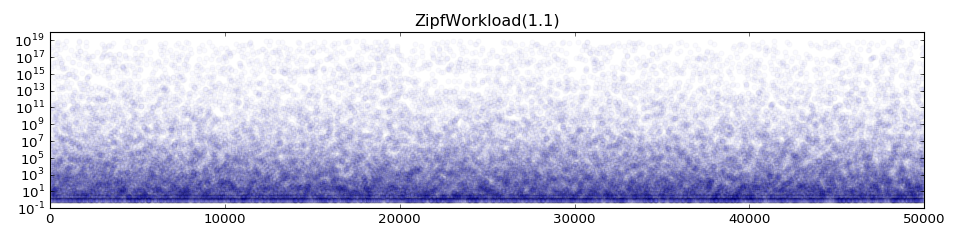

In [120]:
plot_workloads([workloads[str(results[8][0])]])

<IPython.core.display.Javascript object>


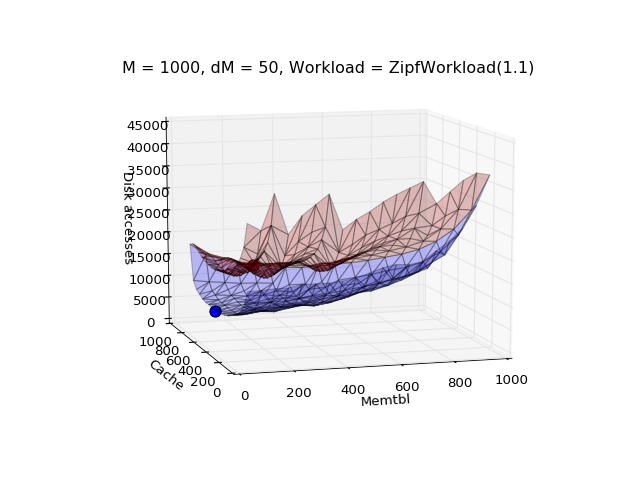

Baseline min: memtbl = 250 cache = 750 bloom = 0
  Monkey min: memtbl = 50 cache = 550 bloom = 400


In [133]:
%matplotlib notebook

plot_result(results[8])

In [99]:
with open('../results30.pkl', 'rb') as f:
  r9 = pickle.load(f)

In [106]:
def xyz_comp(trees):
  vals = np.array([( t.memtbl.size, t.cache.size, t.disk_accesses) for t in trees])
  best = min([( t.disk_accesses, t.memtbl.size, t.cache.size) for t in trees])
  X,Y,Z = vals.T
  return X,Y,Z,best

<IPython.core.display.Javascript object>


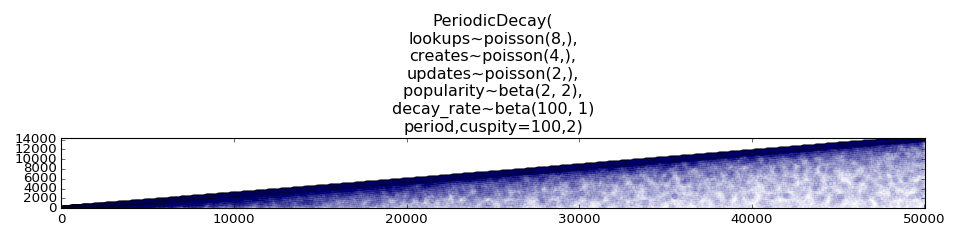

In [116]:
plot_workloads([workloads[str(r9[0])]])

<IPython.core.display.Javascript object>


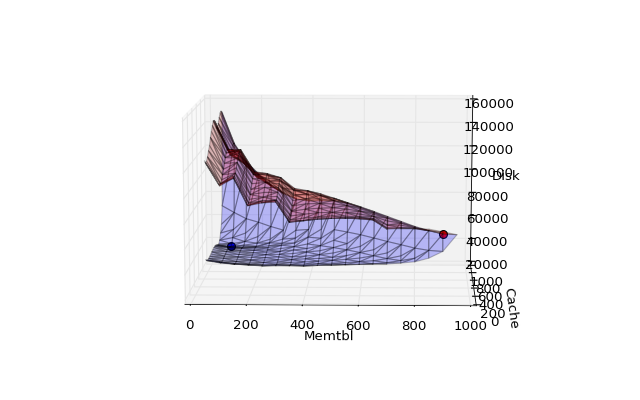

(43226, 100, 650)
(70218, 900, 100)


In [135]:
X1,Y1,Z1,b1 = xyz_comp(r9[4])
X2,Y2,Z2,b2 = xyz_comp(r9[3])
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.subplot(111, projection='3d')
plt.gca().plot_trisurf(X1,Y1,Z1, alpha=0.25, color='blue', label='Monkey')
plt.gca().plot_trisurf(X2,Y2,Z2, alpha=0.25, color='red', label='Baseline')

plt.xlabel('Memtbl')
plt.ylabel('Cache')
plt.gca().set_zlabel('Disk')
plt.scatter([b1[1]],[b1[2]],zs=[b1[0]], c='blue',s=50)
plt.scatter([b2[1]],[b2[2]],zs=[b2[0]], c='red',s=50)

print(b1)
print(b2)

plt.show()